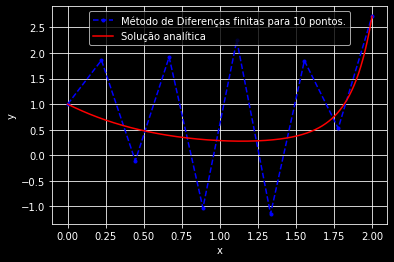

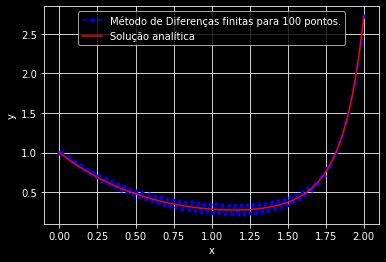

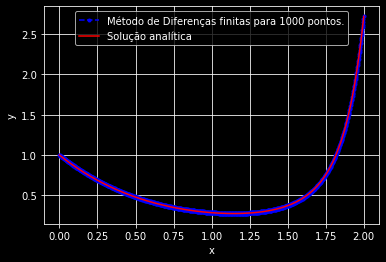

In [6]:
# a friend of mine did this
# his github is github.com/yulopesckp
import numpy as np
import matplotlib.pyplot as plt


def M(n):
    
    A = np.zeros((n, n))
    A[0, 0] = 1
    
    for i in range(1, n-1):
        A[i, i-1] = -1
        A[i, i+1]= 1
        
    A[-1,-1] = 1
    
    return A

    
def first_order(func, fc, M, y0, yf, x0, b, n):
    
    if (n%2) == 1:
        n = n+1
    
    h = (b-x0)/(n)
    B = np.zeros(n)
    y = np.zeros(n)
    B[0] = y0
    B[-1] = yf
    A = np.zeros((n, n))
    x = np.linspace(x0, b, n)
    A = M(n)
 
    for j in range(1000):
            
        for i in range(1, n-1):
            B[i] = 2*h*func(x[i],y[i])
            
        y = np.linalg.solve(A, B)
    
    y = np.matmul(np.linalg.inv(A), B)
    v = np.linspace(x0, b, 1000)
    h = fc(v)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, y, 'b.--', label = "Método de Diferenças finitas para " + str(n) + " pontos.")
    plt.plot(v, h, 'r', label = "Solução analítica")
    plt.legend(loc = "upper center")
    plt.grid()
    plt.show()
    
    return None


def main():
    
    n = 10
    func1 = lambda x, y : y*(x**3-1.5)
    fc = lambda x : np.exp((x**4)/4 - 1.5*x)
    
    for i in range(3):
        
        first_order(func1, fc, M, 1, 2.72, 0, 2, n)
        n *= 10
    

if __name__ == '__main__':
    main()
